# Example radiopadre notebook for example-reduction-dir on Dropbox

The examples below show how to use the radiopadre machinery. The initialization block below (between "####") is mandatory.

You must select "Cell|Run All" from the above menu to re-run the notebook , and wait for it to finish running.

This particular notebook is built for the example results directory that can be downloaded from Dropbox, use this link to download example-reduction-dir from Dropbox:
https://www.dropbox.com/sh/hde4azjdscsw20c/AAB2M0w3Ttm4ioPI0bccOPE-a?dl=0

Then do "cd example-reduction-dir; run-radiopadre.sh" inside your copy of the results directory to start the notebook server and point your browser to the port indicated by the script.

In [1]:
### MANDATORY INIT ###
%matplotlib inline
from radiopadre import DirList
dirs = DirList()
######################

In [2]:
# dirs is a directory list object
# By default displays all directories under your results directory 
# dirs.show() will have the same effect
dirs

#,name,# FITS,# img,# others,modified
0,.,10,0,0,17:02:25 May 12
1,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0,3,13,0,15:06:37 May 12
2,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s4.diffgain-spw0.plots,0,25,0,15:06:28 May 12
3,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s4.diffgain-spw0.plots/padre-thumbnails,0,25,0,17:01:16 May 12
4,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s7.diffgain-spw0.plots,0,25,0,15:06:32 May 12
5,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s7.diffgain-spw0.plots/padre-thumbnails,0,25,0,15:06:32 May 12
6,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s8.diffgain-spw0.plots,0,25,0,15:06:27 May 12


In [3]:
dirs[0].files

#,name,ext,size,modified
0,3C147-CD-LO-spw0-s7-lwimager.fullrest,.fits,128.6M,15:06:43 May 12
1,3C147-CD-LO-spw0-s9-lwimager.fullrest,.fits,64.6M,15:06:43 May 12
2,combined-4M5S-robust0_25,.fits,256.4M,15:06:48 May 12
3,combined-4M5S-robust0_5,.fits,256.5M,15:06:40 May 12
4,vla_L_xx_ampl,.fits,66.3M,15:06:44 May 12
5,vla_L_xx_im,.fits,66.3M,15:06:45 May 12
6,vla_L_xx_re,.fits,66.3M,15:06:41 May 12
7,vla_L_xy_ampl,.fits,66.3M,15:06:49 May 12
8,vla_L_xy_im,.fits,66.3M,15:06:49 May 12
9,vla_L_xy_re,.fits,66.3M,15:06:41 May 12


In [4]:
dirs[0].fits.summary()  # gives list of FITS files in directory #0 above

#,name,size,res,axes,modified
0,3C147-CD-LO-spw0-s7-lwimager.fullrest.fits,4096×4096×2×1,"2""","RA,DEC,STOKES,FREQ",15:06:43 May 12
1,3C147-CD-LO-spw0-s9-lwimager.fullrest.fits,4096×4096×1×1,"2""","RA,DEC,STOKES,FREQ",15:06:43 May 12
2,combined-4M5S-robust0_25.fits,4096×4096×4,"2""","RA,DEC,STOKES",15:06:48 May 12
3,combined-4M5S-robust0_5.fits,4096×4096×4,"2""","RA,DEC,STOKES",15:06:40 May 12
4,vla_L_xx_ampl.fits,513×513×33,"4e+01""","M,L,FREQ",15:06:44 May 12
5,vla_L_xx_im.fits,513×513×33,"4e+01""","M,L,FREQ",15:06:45 May 12
6,vla_L_xx_re.fits,513×513×33,"4e+01""","M,L,FREQ",15:06:41 May 12
7,vla_L_xy_ampl.fits,513×513×33,"4e+01""","M,L,FREQ",15:06:49 May 12
8,vla_L_xy_im.fits,513×513×33,"4e+01""","M,L,FREQ",15:06:49 May 12
9,vla_L_xy_re.fits,513×513×33,"4e+01""","M,L,FREQ",15:06:41 May 12


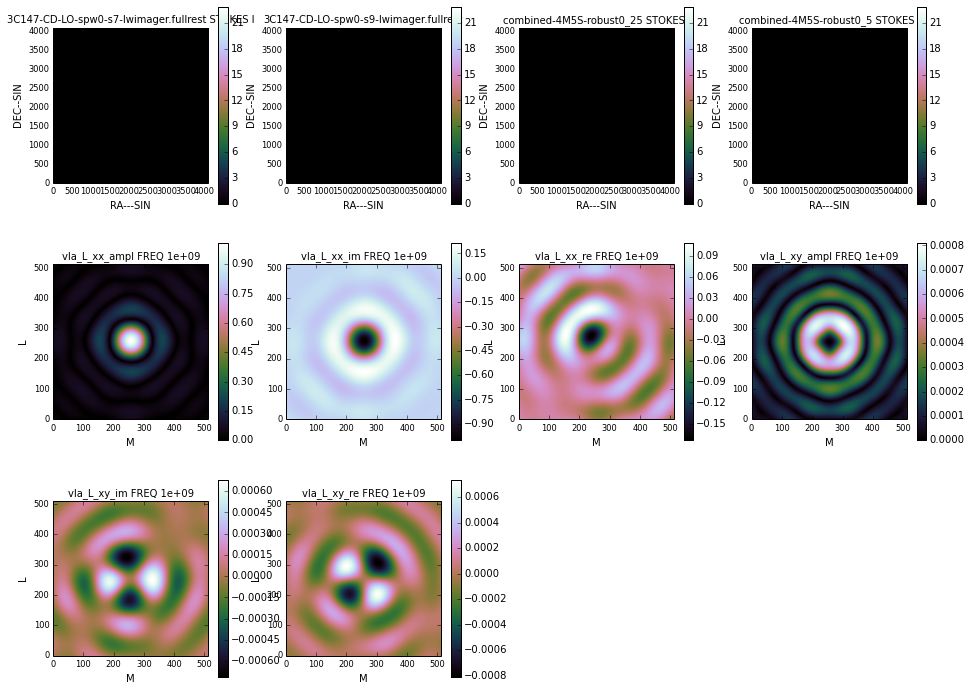

In [5]:
# displays thumbnails for all FITS files in directory #0
dirs[0].fits.thumbs()

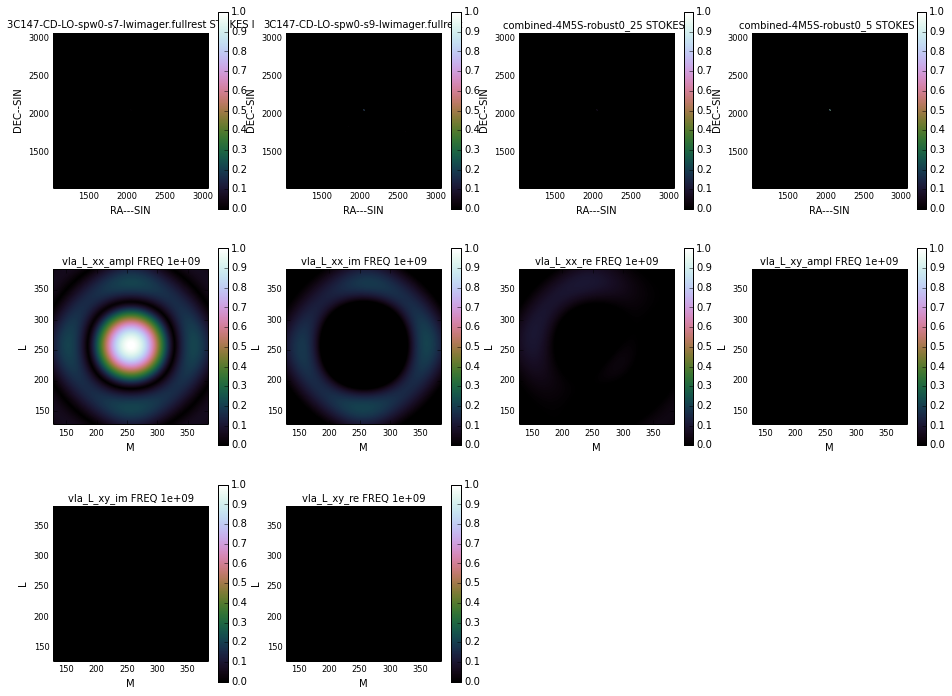

In [6]:
dirs[0].fits.thumbs(zoom=2,vmin=0,vmax=1)

In [7]:
# gives list of FITS files matching the pattern
dirs[0].fits("*s7*")

#,name,ext,size,modified
0,3C147-CD-LO-spw0-s7-lwimager.fullrest,.fits,128.6M,15:06:43 May 12


#,name,ext,size,modified
0,3C147-CD-LO-spw0-s7-lwimager.fullrest,.fits,128.6M,15:06:43 May 12


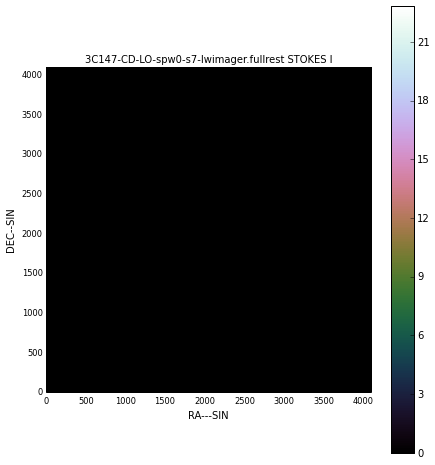

In [8]:
dirs[0].fits("*s7*").show()
dirs[0].fits("*s7*").thumbs()

In [9]:
# list of images (PNG, JPG, etc.) in directory #3
dirs[3].images.show(ncol=2)

#,name,ext,size,modified,#,name,ext,size,modified
0,213.dE-ampl-summary,.png,60k,15:06:28 May 12,13,213.dE-ant-22,.png,23k,15:06:28 May 12
1,213.dE-ant-1,.png,23k,15:06:28 May 12,14,213.dE-ant-23,.png,23k,15:06:28 May 12
2,213.dE-ant-10,.png,23k,15:06:28 May 12,15,213.dE-ant-24,.png,23k,15:06:28 May 12
3,213.dE-ant-11,.png,22k,15:06:28 May 12,16,213.dE-ant-25,.png,23k,15:06:28 May 12
4,213.dE-ant-12,.png,22k,15:06:28 May 12,17,213.dE-ant-26,.png,23k,15:06:28 May 12
5,213.dE-ant-13,.png,23k,15:06:28 May 12,18,213.dE-ant-27,.png,23k,15:06:28 May 12
6,213.dE-ant-14,.png,23k,15:06:28 May 12,19,213.dE-ant-28,.png,23k,15:06:28 May 12
7,213.dE-ant-16,.png,23k,15:06:28 May 12,20,213.dE-ant-3,.png,23k,15:06:28 May 12
8,213.dE-ant-17,.png,22k,15:06:28 May 12,21,213.dE-ant-5,.png,22k,15:06:28 May 12
9,213.dE-ant-18,.png,22k,15:06:28 May 12,22,213.dE-ant-6,.png,23k,15:06:28 May 12


In [10]:
# clickable thumbnails of same
dirs[3].images.thumbs(ncol=6)

'3C147-CD-LO-spw0-s7-lwimager.fullrest.fits (RA,DEC), unrolling STOKES'

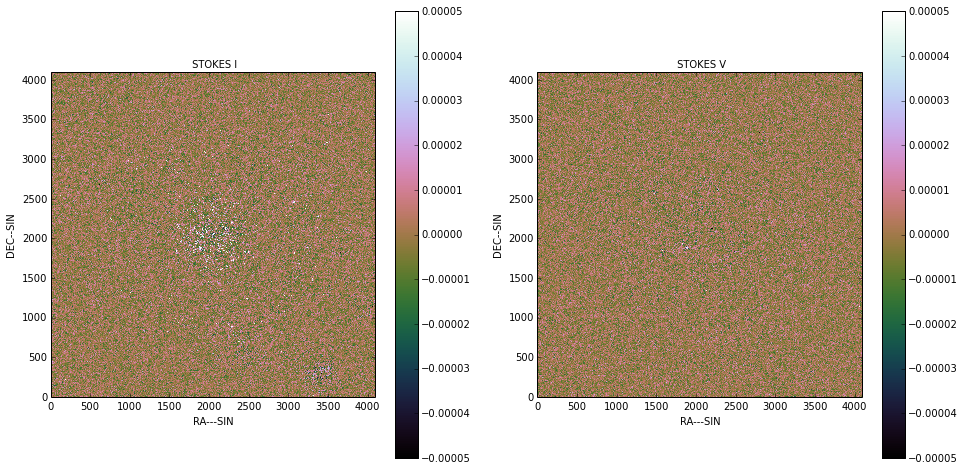

In [11]:
# first FITS file in directory #0. Stokes axis is unrolled by default, but this can be controlled by
# invoking dirs[0].fits[0].show() with some extra arguments
dirs[0].fits[0].show(vmin=-5e-5,vmax=5e-5)

'3C147-CD-LO-spw0-s7-lwimager.fullrest.fits (RA,DEC) zoom x4 STOKES I'

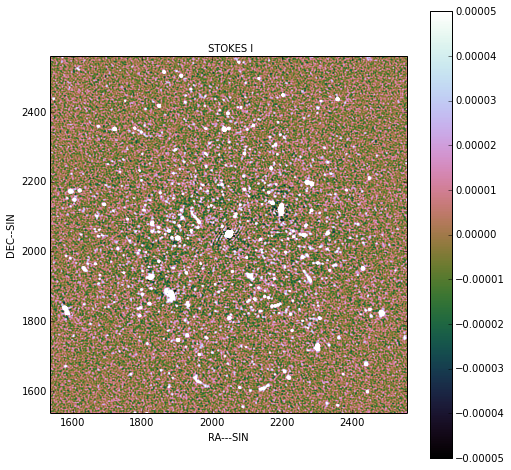

In [12]:
# and this shows how to invoke show() with some explicit arguments to control the rendering
dirs[0].fits[0].show(unroll=None,vmin=-5e-5,vmax=5e-5,zoom=4)

In [13]:
# just some info about the given file
dirs[0].fits[0].info()

3C147-CD-LO-spw0-s7-lwimager.fullrest.fits 4096x4096x2x1 RA---SIN,DEC--SIN,STOKES,FREQ


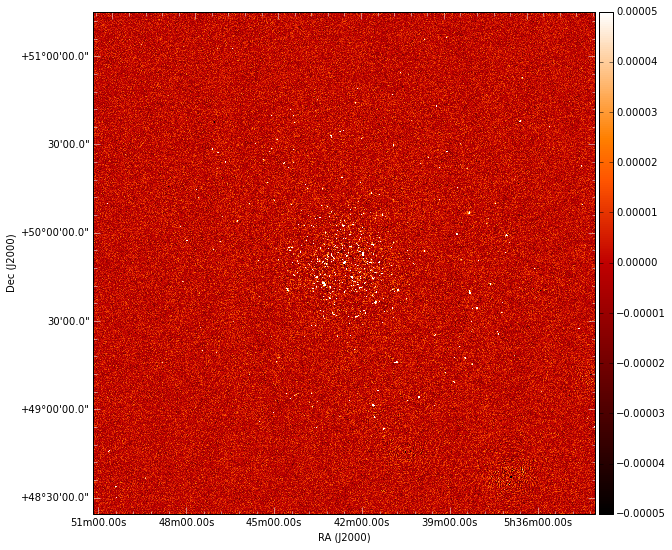

In [14]:
# A more elaborate rendering of the same file using aplpy. Note that .fullpath gives you the path to the file.
# aplpy is quite slow so we don't use it by default for all files, but this example shows you how to do
# a proper rendering
import aplpy
fig = aplpy.FITSFigure(dirs[0].fits[0].fullpath,slices=[0,0])
fig.show_colorscale(cmap='gist_heat',vmin=-5e-5,vmax=5e-5)
fig.add_colorbar()